### 투입된 약물의 양과 오염양 사이의 관계

선형회귀: 데이터를 펼쳐놓고 그 데이터들을 잘 설명할 수 있는 선을 그어놓고 결과값을 예측하는 분석

# y=wx+b <- 1차 함수 식
이 식을 이용해서 가장 좋은 기울기 w와 y절편 b를 구한다.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_home='https://github.com/dknife/ML/raw/main/data/'
po_data=pd.read_csv(data_home+'pollution.csv')
print(po_data)
# dataset 불러오기

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


In [ ]:
# 10행부터 15행까지 출력해보기

print(po_data[10:16])

       input  pollution
10  0.206014   4.334919
11  0.150001   5.378262
12  0.392948   3.191317
13  0.420919   2.021181
14  0.330716   4.245457
15  0.481756   3.735627


In [ ]:
input_min=po_data['input'].min()
input_max=po_data['input'].max()
print(input_min,input_max)

po_min=po_data['pollution'].min()
po_max=po_data['pollution'].max()
print(po_min,po_max)

# 투입된 약물 양과 오염양의 min, max 값을 구한다.

0.0006637621949165 0.4849026075901378
2.021180656913125 6.213236503640302


In [ ]:
def hypothesis_line(x,w,b):
  return w*x+b
# wx+b=y 에 대한 값을 구하는 함수

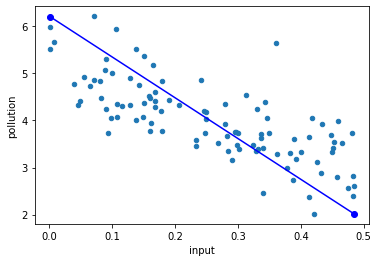

In [ ]:
w=-(po_max-po_min)/(input_max-input_min)
b=po_max
po_data.plot(kind='scatter',x='input',y='pollution')

plt.plot([input_min,input_max],[hypothesis_line(input_min,w,b),
                                hypothesis_line(input_max,w,b)],'bo-')

plt.show()

# 투입된 약물 양과 오염도에 대한 산점도를 그리고, 그 위에 선형선을 그린다.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X=po_data['input'].to_numpy()
y=po_data['pollution'].to_numpy()
print("X.shape={},y.shape={}".format(X.shape,y.shape))

X.shape=(100,),y.shape=(100,)


In [ ]:
X=X.reshape(100,1)
y=y.reshape(100,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_w=linear_reg.coef_.item() #기울기
lr_b=linear_reg.intercept_.item() #절편

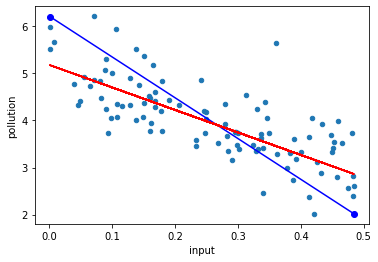

In [ ]:
po_data.plot(kind='scatter',x='input',y='pollution')
plt.plot([input_min,input_max],[hypothesis_line(input_min,w,b),
                                hypothesis_line(input_max,w,b)],'bo-')
plt.plot(X_train,lr_w*X_train+lr_b,'r-')

In [ ]:
Train_score=linear_reg.score(X_train,y_train)
Test_score=linear_reg.score(X_test,y_test)
print("Train=",Train_score)
print("Test=",Test_score)

Train= 0.5891753953657519
Test= 0.3726714175063077


train 시킨 score의 값이 test 시킨 score 값보다 약 1.6배보다 높게 나왔다.
성능이 좀 떨어진다는 것을 알 수 있다. 그리고 투입된 약물의 양이 많을수록 오염양이 적다는 것을 알 수 있다. 하지만 test 값보다 train 값에서 투입된 약물의 양이 많을 때 오염양이 더 높게 나타나는 것을 확인할 수 있다.


### Boston housing dataset 선형회귀 분석

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

boston=datasets.load_boston()
print(boston.feature_names)
print(boston.data.shape)
print(boston.keys())
print("----")

# 보스턴 하우징 데이터셋을 불러와서 컬럼 이름이랑 데이터 타입이랑 전체 행과 열 길이를 확인한다.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data=pd.DataFrame(boston.data)
data.columns=boston.feature_names
# 보스턴 데이터셋을 DF로 정제한다.

In [ ]:
data['Price']=boston.target
data.head()
# 보스턴 데이터셋중에 target을 Price로 컬럼명을 변경한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


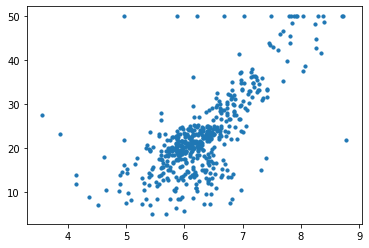

In [ ]:
plt.scatter(boston.data[:,5],boston.target,s=10)

In [ ]:
lr=linear_model.LinearRegression()
x=boston.data[:,5]
x1=np.atleast_2d(x)
x2=np.transpose(x1)
y=boston.target
lr.fit(x2,y) 

print(lr.intercept_)
print(lr.coef_)

# 선형 회귀 모델 만들기

-34.67062077643857
[9.10210898]


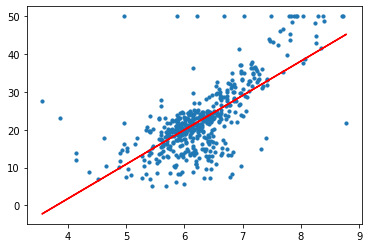

In [ ]:
y_pred=lr.predict(x2)
plt.scatter(boston.data[:,5],boston.target,s=10)
plt.plot(x2,y_pred,color='r')

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,lr.predict(x2)) # 평균 제곱 오차
rmse=np.sqrt(mse) # 평균 제곱근 오차

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y,lr.predict(x2))
print(r2)
# r2 score 구하기

0.48352545599133423


In [ ]:
from sklearn.model_selection import train_test_split
x_data=data.loc[:,['LSTAT','RM']]
y_data=data.loc[:,'Price']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True,random_state=42)
#학습 데이터와 테스트 데이터 분할
lr.fit(x_train,y_train)
print("w=",np.round(lr.coef_,1))
print("b=",np.round(lr.intercept_,1))
#w랑 b 확인


w= [-0.6  5.5]
b= -3.8


In [ ]:
residuals=data['Price']-prediction
residuals.describe()
# 적합도 검증

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [ ]:
SSE=(residuals**2).sum()
SST=((data['Price']-data['Price'].mean())**2).sum()
R_squared=1-(SSE/SST)
print(R_squared)

0.4835254559913341


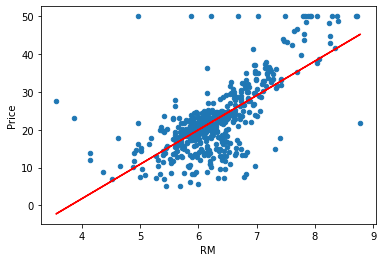

In [ ]:
data.plot(kind='scatter',x="RM",y="Price")
plt.plot(data['RM'],prediction,color='r')

In [ ]:
print('score: ', lr.score(X=pd.DataFrame(data['RM']), y= data['Price']))
print('Mean Squared Error: ', mean_squared_error(prediction, data['Price']))
print('RMSE: ', mean_squared_error(prediction, data['Price'])**.5)

score:  0.48352545599133423
Mean Squared Error:  43.60055177116956
RMSE:  6.603071389222561
